In [11]:
#importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#reading data
df=pd.read_csv("supply_chain_deliveries.csv")

In [13]:

df.head(5)

,WorkDate,Customer,Location,BusinessType,OrderCount,NumberOfPieces,TotalRevenue
0,2020-01-02,Amazon,Chicago,Final Mile,38,190,2084.09
1,2020-01-02,Home Depot,Sacramento,Final Mile,34,136,6153.01
2,2020-01-02,Home Depot,Chicago,Final Mile,43,215,15691.72
3,2020-01-02,Home Depot,Detroit,Final Mile,41,164,6490.39
4,2020-01-02,Home Depot,Atlanta,Final Mile,44,220,10069.65


In [14]:
df.shape

(126255, 7)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126255 entries, 0 to 126254
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   WorkDate        126255 non-null  object 
 1   Customer        126255 non-null  object 
 2   Location        126255 non-null  object 
 3   BusinessType    126255 non-null  object 
 4   OrderCount      126255 non-null  int64  
 5   NumberOfPieces  126255 non-null  int64  
 6   TotalRevenue    126255 non-null  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 6.7+ MB


Converting Date column into DateTime format

In [16]:
df['WorkDate'] = pd.to_datetime(df['WorkDate'])


In [17]:
df["WorkDate"].min()

Timestamp('2020-01-02 00:00:00')

In [18]:
df['WorkDate'].max()

Timestamp('2025-06-30 00:00:00')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126255 entries, 0 to 126254
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   WorkDate        126255 non-null  datetime64[ns]
 1   Customer        126255 non-null  object        
 2   Location        126255 non-null  object        
 3   BusinessType    126255 non-null  object        
 4   OrderCount      126255 non-null  int64         
 5   NumberOfPieces  126255 non-null  int64         
 6   TotalRevenue    126255 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 6.7+ MB


In [20]:
#checking for any null or missing value
df.isnull().sum()

WorkDate          0
Customer          0
Location          0
BusinessType      0
OrderCount        0
NumberOfPieces    0
TotalRevenue      0
dtype: int64

No column with missing value 
Data seems clear

Univariate Analysis

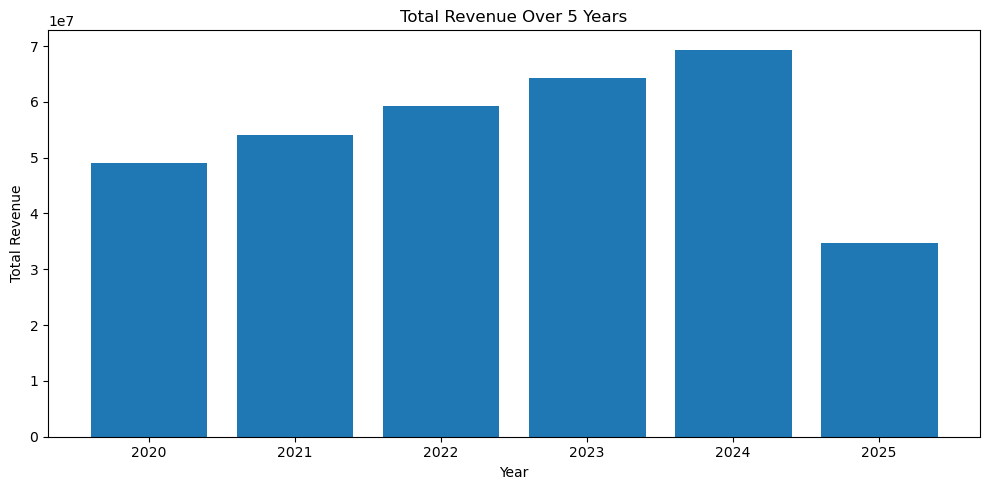

In [21]:
# Extract year
df['Year'] = df['WorkDate'].dt.year

# Group by year and sum revenue
yearly_revenue = df.groupby('Year')['TotalRevenue'].sum().reset_index()

# Plot bar chart
plt.figure(figsize=(10,5))
plt.bar(yearly_revenue['Year'].astype(str), yearly_revenue['TotalRevenue'])
plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Total Revenue Over 5 Years")
plt.tight_layout()
plt.show()

### Insights

- **2024 recorded the highest total revenue** among all years.
- There is a **clear upward trend in total revenue** from 2020 through 2024.
- The revenue for **2025 appears lower** because the dataset **does not include all days of the year**, resulting in incomplete data for that period.


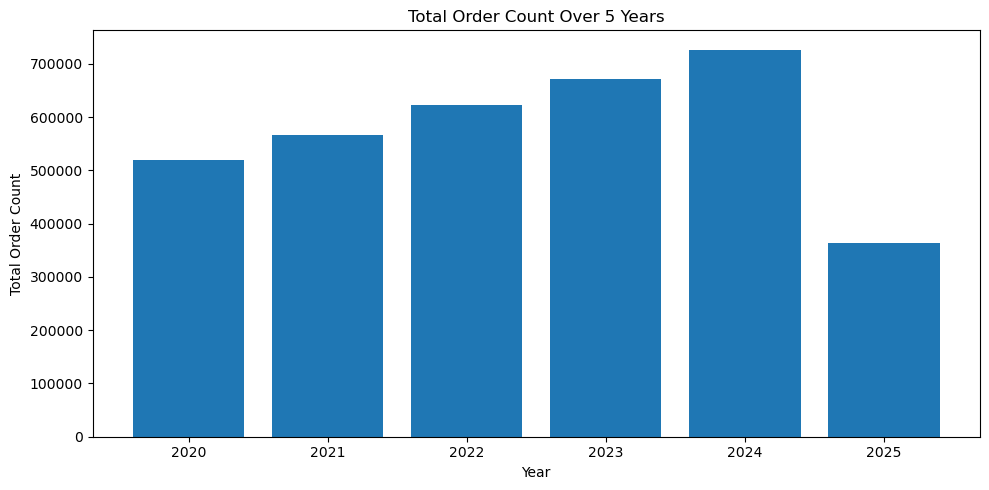

In [22]:
# Extract year
df['Year'] = df['WorkDate'].dt.year

# Group by year and sum the order counts
yearly_orders = df.groupby('Year')['OrderCount'].sum().reset_index()

# Plot bar graph
plt.figure(figsize=(10,5))
plt.bar(yearly_orders['Year'].astype(str), yearly_orders['OrderCount'])
plt.xlabel("Year")
plt.ylabel("Total Order Count")
plt.title("Total Order Count Over 5 Years")
plt.tight_layout()
plt.show()

### Insight

- The **total order count mirrors the trend of total revenue**, indicating a **direct positive relationship** between the two.


Bi-Variate Analysis 

<Figure size 1200x600 with 0 Axes>

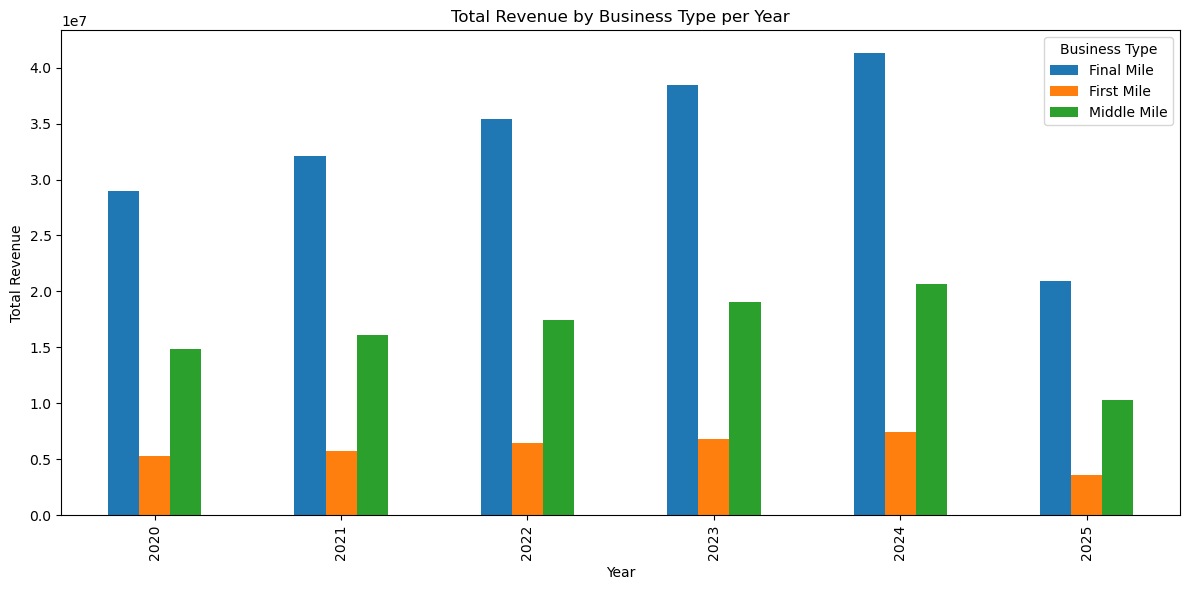

In [23]:
# Extract year
df['Year'] = df['WorkDate'].dt.year

# Group by Year and BusinessType and sum TotalRevenue
grouped = df.groupby(['Year', 'BusinessType'])['TotalRevenue'].sum().unstack()

# Plot grouped bar chart
plt.figure(figsize=(12,6))
grouped.plot(kind='bar', figsize=(12,6))

plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Business Type per Year")
plt.legend(title="Business Type")
plt.tight_layout()
plt.show()

### Insight

- **Final Mile** is the top contributor to total revenue in every year, followed by **Middle Mile** and **First Mile**.


<Figure size 1400x600 with 0 Axes>

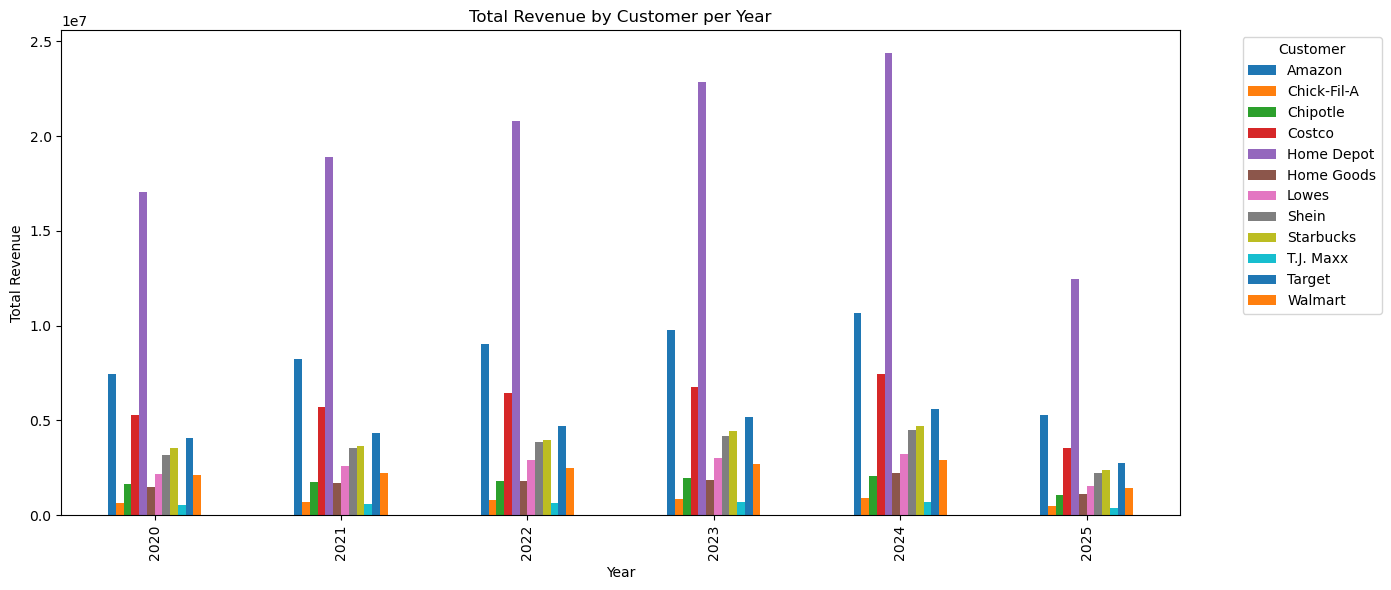

In [24]:
# Extract year
df['Year'] = df['WorkDate'].dt.year

# Group by Year and Customer, summing TotalRevenue
grouped = df.groupby(['Year', 'Customer'])['TotalRevenue'].sum().unstack()

# Plot grouped bar chart
plt.figure(figsize=(14,6))
grouped.plot(kind='bar', figsize=(14,6))

plt.xlabel("Year")
plt.ylabel("Total Revenue")
plt.title("Total Revenue by Customer per Year")
plt.legend(title="Customer", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Insight

- **Home Depot consistently contributes the highest total revenue each year** compared to other customers.


In [25]:
#saving the modified dataset for forecasting
df.to_csv("dataset.csv", index=False)
